## Warm-up :: Anscombes Quartet

### Load data

In [2]:
import seaborn as sns

df = sns.load_dataset("anscombe")
df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
df['dataset'].value_counts()

I      11
II     11
III    11
IV     11
Name: dataset, dtype: int64

### Scatter plot

In [4]:
import plotly.express as px

fig = px.scatter(df, x='x', y="y", color="dataset")
fig.show()

### lmplot

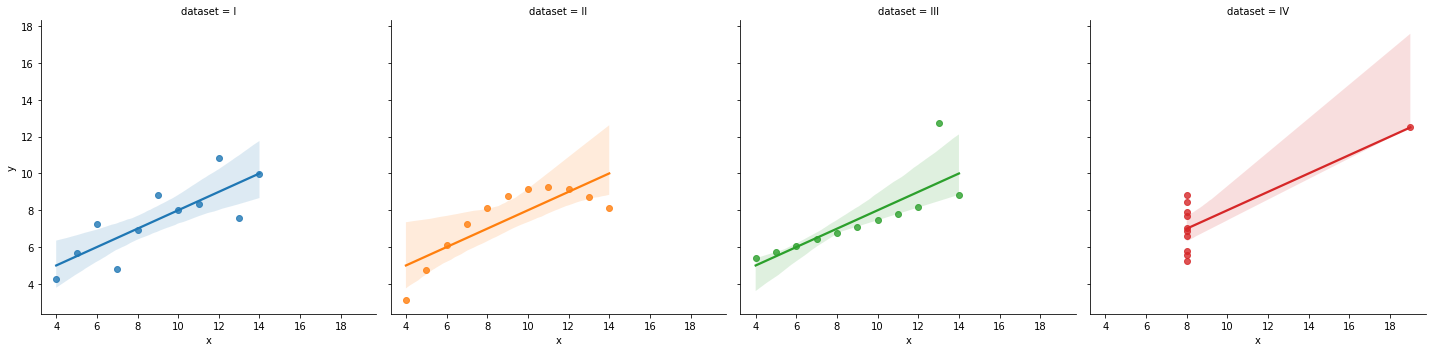

In [5]:
sns.lmplot(col='dataset', data=df, x='x', y='y', hue='dataset')

### Describe

In [6]:
df.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [7]:
df.groupby("dataset").describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [8]:
df.pivot(columns='dataset').describe()

x                                           y             \
dataset          I         II        III         IV          I         II   
count    11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean      9.000000   9.000000   9.000000   9.000000   7.500909   7.500909   
std       3.316625   3.316625   3.316625   3.316625   2.031568   2.031657   
min       4.000000   4.000000   4.000000   8.000000   4.260000   3.100000   
25%       6.500000   6.500000   6.500000   8.000000   6.315000   6.695000   
50%       9.000000   9.000000   9.000000   8.000000   7.580000   8.140000   
75%      11.500000  11.500000  11.500000   8.000000   8.570000   8.950000   
max      14.000000  14.000000  14.000000  19.000000  10.840000   9.260000   

                               
dataset        III         IV  
count    11.000000  11.000000  
mean      7.500000   7.500909  
std       2.030424   2.030579  
min       5.390000   5.250000  
25%       6.250000   6.170000  
50%       7.110000   7.040000  
75%       7.980000   8.190000  
max      12.740000  12.500000

## 3.2.3. Example

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# from mglearn import datasets
import mglearn
import pylab as plt

In [10]:
X, y = mglearn.datasets.make_wave(n_samples=60)

# X

Coefficients: [0.39390555]
Intercept   : -0.031804343026759746
train score : 0.6700890315075756
test score  : 0.65933685968637


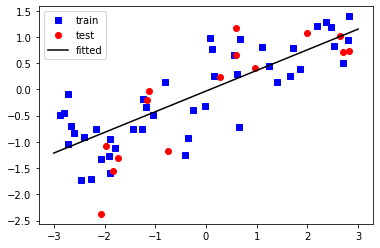

In [11]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(Xtrain, ytrain)

print("Coefficients:", lr.coef_)
print("Intercept   :", lr.intercept_)

print("train score :", lr.score(Xtrain, ytrain))
print("test score  :", lr.score(Xtest, ytest))


# plot the thing
import numpy as np
Xideal = np.linspace(-3.0, 3.0, 100)
yideal = lr.coef_[0] * Xideal + lr.intercept_

plt.figure()
plt.plot(Xtrain, ytrain, 'bs', label="train")
plt.plot(Xtest, ytest, 'ro', label="test")
plt.plot(Xideal, yideal, 'k-', label="fitted")
plt.legend()
plt.savefig('linear.png')
plt.show()